## Read apple_2023_masked.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import acf, pacf, grangercausalitytests

import yfinance as yf

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
nvidia = yf.Ticker("NVDA")
#nvidia = yf.Ticker("TSM")
nvda_data = nvidia.history(start='2023-01-01', end='2024-01-01')
nvda_data['Diff'] = nvda_data['Close'].diff()
nvda_data['Daily Return'] = nvda_data['Close'].pct_change()
nvda_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Diff,Daily Return
Date,,,,,,,,,
2023-01-03 00:00:00-05:00,148.437144,149.886445,140.890860,143.079773,40127700,0.0,0.0,NaN,NaN
2023-01-04 00:00:00-05:00,145.598564,148.457162,142.340168,147.417679,43132400,0.0,0.0,4.337906,0.030318
2023-01-05 00:00:00-05:00,144.838949,145.568587,141.410623,142.580048,38916800,0.0,0.0,-4.837631,-0.032816
2023-01-06 00:00:00-05:00,144.669033,150.026405,140.271181,148.517136,40504400,0.0,0.0,5.937088,0.041640
2023-01-09 00:00:00-05:00,152.765039,160.481254,151.335747,156.203354,50423100,0.0,0.0,7.686218,0.051753
...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,491.926922,493.806808,484.647265,488.277069,25213900,0.0,0.0,-1.599945,-0.003266
2023-12-26 00:00:00-05:00,489.657037,495.976748,489.577054,492.766907,24420000,0.0,0.0,4.489838,0.009195
2023-12-27 00:00:00-05:00,495.086748,496.776671,490.826969,494.146820,23364800,0.0,0.0,1.379913,0.002800


In [4]:
data = pd.read_csv("../apple_2023_masked.csv", parse_dates=[0], infer_datetime_format = True)

In [5]:
data = data.set_index('Date')

In [6]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day
Date,,,,,,,,,,,,
2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042
2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515
2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451
2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867
2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,193.091385,193.091385,193.091385
2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,192.542816,192.542816,192.542816
2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,192.642548,192.642548,192.642548


In [7]:
# Forecast missing values
def impute_missing_values(data, results,s):
    for i in range(len(data)):
        ## s="1day diff", "2day diff",..., "5day diff"
        if np.isnan(data[s].iloc[i]):  # Check if the Adj Diff Missing is np.nan
            # Get the previous available data points up to the maxlags
            data_slice = data.drop(columns = [s]).iloc[i - results.k_ar:i].values
            if len(data_slice) == results.k_ar:
                forecast = results.forecast(data_slice, steps=1)
                data[s].iloc[i] = forecast[0, 0]  # Impute the missing value using the forecast
    return data

In [8]:
def gc_optimal_lag(data, variables,test='ssr_chi2test', verbose=False):    
    #test_result = grangercausalitytests(data[variables], maxlag=15, verbose=False)
    test_result = grangercausalitytests(data[variables].dropna(), maxlag=15, verbose=False)
    p_values = [round(test_result[i+1][0][test][1],4) for i in range(15)]
    min_p_value = np.min(p_values)
    if min_p_value < 0.05:
        opt_lag = 1 + np.argmin(p_values) # index starts from 0 while lag starts from 1
    else:
        opt_lag = 7
    return opt_lag    

## Imputing missing 1 data

In [9]:
## Create a dataframe that contains 1day (missing 3 data points)

df1 = data[['Close','1day']].copy()
#df1 = df1.set_index('Date')
df1['NVDA Diff'] = nvda_data['Diff']
df1['NVDA Daily Return'] = nvda_data['Daily Return']

## Baseline Model
df1['Interpolating'] = df1['1day'].interpolate(method='linear')
mses1 = {}
mses1['Linear Interpolating'] = mean_squared_error(df1['Interpolating'],df1['Close'])*(len(df1)/(data['1day'].isnull().sum()))


## Create imputing dataframe
df1_imputing = df1.copy()

# Filliing NA data to apply VAR
df1_imputing['1day diff'] = df1_imputing['1day'].diff()
#df1_imputing['VAR imputation'] = df1_imputing['1day diff'].ffill().bfill()
df1_imputing['VAR imputation'] = df1_imputing['1day diff'].interpolate(method='linear')
df1_imputing = df1_imputing[['1day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df1_imputing = df1_imputing.drop(df1_imputing.index[[0]])

## VAR
lag_1 = gc_optimal_lag(df1_imputing, ['1day diff', 'NVDA Diff'])
model_1 = VAR(df1_imputing.drop(columns=['1day diff']))
#lag_1 = gc_optimal_lag(df1_imputing, ['VAR imputation', 'NVDA Diff'])
print(lag_1)
results_1 = model_1.fit(lag_1)
imputed_data_1 = impute_missing_values(df1_imputing.copy(), results_1, '1day diff')

df1['1day diff'] = imputed_data_1['1day diff']

for i in range(len(df1)):
    if np.isnan(df1["1day"].iloc[i]):
        df1["1day"].iloc[i] = df1["1day diff"].iloc[i]+df1["1day"].iloc[i-1]

# Compute MSE
mses1['VAR model'] = mean_squared_error(df1['1day'],data['Close'])*(len(df1)/(data['1day'].isnull().sum()))

mses1

7


C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'Linear Interpolating': 0.679228361280242, 'VAR model': 2.0178131842416693}

In [10]:
sorted_model_1 = model_1.select_order(maxlags=20)
sorted_model_1.summary()

,AIC,BIC,FPE,HQIC
0,6.019*,6.049*,411.2*,6.031*
1,6.032,6.122,416.5,6.068
2,6.058,6.208,427.4,6.118
3,6.076,6.286,435.1,6.160
4,6.081,6.351,437.3,6.190
5,6.104,6.434,447.9,6.238
6,6.136,6.526,462.5,6.294
7,6.153,6.603,470.3,6.335
8,6.178,6.688,482.3,6.384
9,6.189,6.759,487.8,6.419


In [11]:
grangercausalitytests(df1_imputing[['1day diff','NVDA Diff']].dropna(), maxlag=15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0571  , p=0.8113  , df_denom=231, df_num=1
ssr based chi2 test:   chi2=0.0579  , p=0.8099  , df=1
likelihood ratio test: chi2=0.0579  , p=0.8099  , df=1
parameter F test:         F=0.0571  , p=0.8113  , df_denom=231, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9018  , p=0.4073  , df_denom=228, df_num=2
ssr based chi2 test:   chi2=1.8432  , p=0.3979  , df=2
likelihood ratio test: chi2=1.8359  , p=0.3993  , df=2
parameter F test:         F=0.9018  , p=0.4073  , df_denom=228, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6213  , p=0.6019  , df_denom=225, df_num=3
ssr based chi2 test:   chi2=1.9219  , p=0.5888  , df=3
likelihood ratio test: chi2=1.9140  , p=0.5904  , df=3
parameter F test:         F=0.6213  , p=0.6019  , df_denom=225, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9964  , p=0.0961  

{1: ({'ssr_ftest': (0.05711916359626453, 0.8113204629417378, 231.0, 1),
   'ssr_chi2test': (0.05786097091569654, 0.8099092742979578, 1),
   'lrtest': (0.05785381847931603, 0.8099207987705433, 1),
   'params_ftest': (0.057119163596286916, 0.8113204629416962, 231.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.9018051343101091, 0.40727895415325366, 228.0, 2),
   'ssr_chi2test': (1.8431631253882055, 0.3978892563895102, 2),
   'lrtest': (1.8359111086365374, 0.39933462504161815, 2),
   'params_ftest': (0.9018051343101389, 0.40727895415324333, 228.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6213185337279433, 0.6018819846369744, 225.0, 3),
   'ssr_chi2test': (1.9219453309984382, 0.5887642146590142, 3),
   'lrtest': (1.9140280914909908, 0.590440782124174, 3),
   'params_ftest': (0.6213185337279278, 0.6018819846369852, 225.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

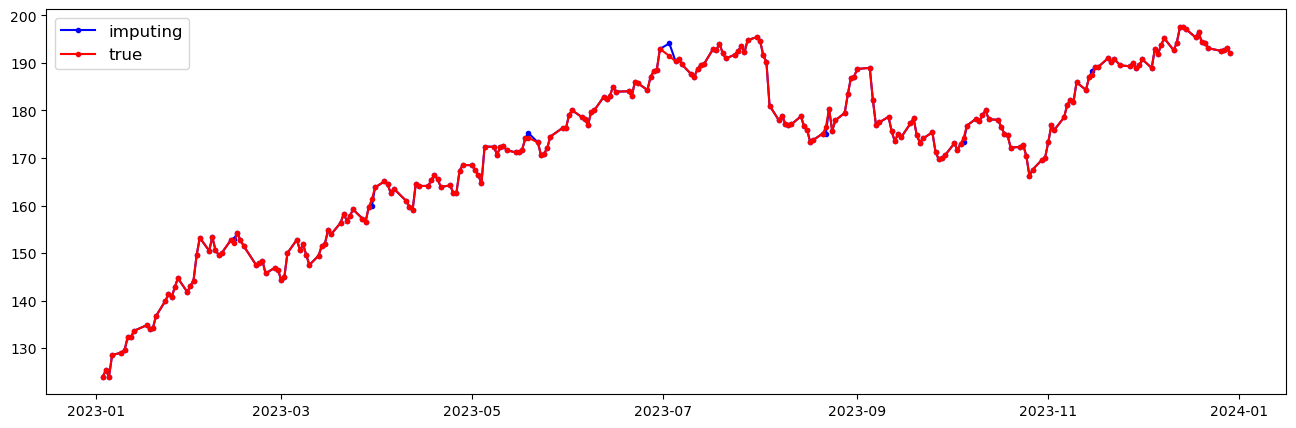

In [12]:
## Plot
plt.figure(figsize=((16,5)))
plt.plot(df1['1day'],'.-',color='b',label='imputing')
plt.plot(df1['Close'],'.-',color='r',label='true')

plt.legend(fontsize=12)
plt.show()

## Imputing missing 2day

In [13]:
## Create a dataframe that contains 1day (missing 3 data points)

df2 = data[['Close','2day']].copy()
df2['NVDA Diff'] = nvda_data['Diff']
df2['NVDA Daily Return'] = nvda_data['Daily Return']

## Baseline Model
df2['Interpolating'] = df2['2day'].interpolate(method='linear')
mses2 = {}
mses2['Linear Interpolating'] = mean_squared_error(df2['Interpolating'],df2['Close'])*(len(df2)/(data['2day'].isnull().sum()))


## Create imputing dataframe
df2_imputing = df2.copy()

# Filliing NA data to apply VAR
df2_imputing['2day diff'] = df2_imputing['2day'].diff()
#df2_imputing['VAR imputation'] = df2_imputing['2day diff'].ffill().bfill()
df2_imputing['VAR imputation'] = df2_imputing['2day diff'].interpolate(method='linear')
df2_imputing = df2_imputing[['2day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df2_imputing = df2_imputing.drop(df2_imputing.index[[0]])

## VAR
lag_2 = gc_optimal_lag(df2_imputing, ['2day diff', 'NVDA Diff'])
model_2 = VAR(df2_imputing.drop(columns=['2day diff']))
#lag_2 = gc_optimal_lag(df2_imputing, ['VAR imputation', 'NVDA Diff'])
print(lag_2)
results_2 = model_2.fit(lag_2)
imputed_data_2 = impute_missing_values(df2_imputing.copy(), results_2, '2day diff')

df2['2day diff'] = imputed_data_2['2day diff']

for i in range(len(df2)):
    if np.isnan(df2["2day"].iloc[i]):
        df2["2day"].iloc[i] = df2["2day diff"].iloc[i]+df2["2day"].iloc[i-1]

# Compute MSE
mses2['VAR model'] = mean_squared_error(df2['2day'],data['Close'])*(len(df2)/(data['2day'].isnull().sum()))

mses2

7


C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'Linear Interpolating': 2.526317467717179, 'VAR model': 4.627628459045149}

In [14]:
#grangercausalitytests(df2_imputing[['VAR imputation','NVDA Diff']], maxlag=15)
grangercausalitytests(df2_imputing[['2day diff','NVDA Diff']].dropna(), maxlag=15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9078  , p=0.3417  , df_denom=224, df_num=1
ssr based chi2 test:   chi2=0.9200  , p=0.3375  , df=1
likelihood ratio test: chi2=0.9181  , p=0.3380  , df=1
parameter F test:         F=0.9078  , p=0.3417  , df_denom=224, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2051  , p=0.3016  , df_denom=221, df_num=2
ssr based chi2 test:   chi2=2.4648  , p=0.2916  , df=2
likelihood ratio test: chi2=2.4515  , p=0.2935  , df=2
parameter F test:         F=1.2051  , p=0.3016  , df_denom=221, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8446  , p=0.4708  , df_denom=218, df_num=3
ssr based chi2 test:   chi2=2.6152  , p=0.4548  , df=3
likelihood ratio test: chi2=2.6002  , p=0.4575  , df=3
parameter F test:         F=0.8446  , p=0.4708  , df_denom=218, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6816  , p=0.1553  

{1: ({'ssr_ftest': (0.9077946224346377, 0.3417272311212073, 224.0, 1),
   'ssr_chi2test': (0.9199525861279587, 0.33748742190809844, 1),
   'lrtest': (0.9180934822820745, 0.3379760599845559, 1),
   'params_ftest': (0.907794622434653, 0.3417272311212006, 224.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.205144975684109, 0.3016099836388218, 221.0, 2),
   'ssr_chi2test': (2.464821398231752, 0.29158879686499567, 2),
   'lrtest': (2.4514773058722312, 0.29354079545425366, 2),
   'params_ftest': (1.2051449756841128, 0.3016099836388218, 221.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.8446263427325524, 0.47078499508953586, 218.0, 3),
   'ssr_chi2test': (2.61524211625905, 0.45482367086138786, 3),
   'lrtest': (2.6001600034046533, 0.4574614969052432, 3),
   'params_ftest': (0.8446263427325645, 0.470784995089527, 218.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

In [15]:
sorted_model_2 = model_2.select_order(maxlags=20)
sorted_model_2.summary()

,AIC,BIC,FPE,HQIC
0,5.984*,6.014*,397.1*,5.996*
1,5.989,6.079,399.0,6.025
2,6.011,6.161,407.8,6.071
3,6.011,6.221,407.8,6.096
4,6.022,6.292,412.3,6.131
5,6.044,6.374,421.7,6.177
6,6.076,6.466,435.5,6.234
7,6.085,6.534,439.2,6.266
8,6.112,6.622,451.6,6.318
9,6.133,6.703,461.1,6.363


## Imputing Missing 3day

In [16]:
## Create a dataframe that contains 3day (missing 3 data points)

df3 = data[['Close','3day']].copy()
df3['NVDA Diff'] = nvda_data['Diff']
df3['NVDA Daily Return'] = nvda_data['Daily Return']

## Baseline Model
df3['Interpolating'] = df3['3day'].interpolate(method='linear')
mses3 = {}
mses3['Linear Interpolating'] = mean_squared_error(df3['Interpolating'],df3['Close'])*(len(df3)/(data['3day'].isnull().sum()))


## Create imputing dataframe
df3_imputing = df3.copy()

# Filliing NA data to apply VAR
df3_imputing['3day diff'] = df3_imputing['3day'].diff()
#df3_imputing['VAR imputation'] = df3_imputing['3day diff'].ffill().bfill()
df3_imputing['VAR imputation'] = df3_imputing['3day diff'].interpolate(method='linear')
df3_imputing = df3_imputing[['3day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df3_imputing = df3_imputing.drop(df3_imputing.index[[0]])

## VAR
lag_3 = gc_optimal_lag(df3_imputing, ['3day diff', 'NVDA Diff'])
model_3 = VAR(df3_imputing.drop(columns=['3day diff']))
#lag_3 = gc_optimal_lag(df3_imputing, ['VAR imputation', 'NVDA Diff'])
print(lag_3)
results_3 = model_3.fit(lag_3)
imputed_data_3 = impute_missing_values(df3_imputing.copy(), results_3, '3day diff')

df3['3day diff'] = imputed_data_3['3day diff']

for i in range(len(df3)):
    if np.isnan(df3["3day"].iloc[i]):
        df3["3day"].iloc[i] = df3["3day diff"].iloc[i]+df3["3day"].iloc[i-1]

# Compute MSE
mses3['VAR model'] = mean_squared_error(df3['3day'],data['Close'])*(len(df3)/(data['3day'].isnull().sum()))

mses3

7


C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'Linear Interpolating': 1.8751985815220782, 'VAR model': 6.896456518175831}

In [17]:
sorted_model_3 = model_3.select_order(maxlags=20)
sorted_model_3.summary()

,AIC,BIC,FPE,HQIC
0,5.984*,6.014*,397.0*,5.996*
1,5.988,6.078,398.8,6.025
2,6.006,6.156,405.7,6.066
3,6.004,6.213,404.9,6.088
4,6.015,6.285,409.8,6.124
5,6.039,6.369,419.5,6.172
6,6.070,6.460,432.9,6.227
7,6.079,6.528,436.6,6.260
8,6.104,6.614,447.9,6.310
9,6.124,6.694,457.3,6.354


## Imputing Missing 4day

In [18]:
## Create a dataframe that contains 4day (missing 4 data points)

df4 = data[['Close','4day']].copy()
df4['NVDA Diff'] = nvda_data['Diff']
df4['NVDA Daily Return'] = nvda_data['Daily Return']

## Baseline Model
df4['Interpolating'] = df4['4day'].interpolate(method='linear')
mses4 = {}
mses4['Linear Interpolating'] = mean_squared_error(df4['Interpolating'],df4['Close'])*(len(df4)/(data['4day'].isnull().sum()))


## Create imputing dataframe
df4_imputing = df4.copy()

# Filliing NA data to apply VAR
df4_imputing['4day diff'] = df4_imputing['4day'].diff()
#df4_imputing['VAR imputation'] = df4_imputing['4day diff'].ffill().bfill()
df4_imputing['VAR imputation'] = df4_imputing['4day diff'].interpolate(method='linear')
df4_imputing = df4_imputing[['4day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df4_imputing = df4_imputing.drop(df4_imputing.index[[0]])

## VAR
lag_4 = gc_optimal_lag(df4_imputing, ['4day diff', 'NVDA Diff'])
model_4 = VAR(df4_imputing.drop(columns=['4day diff']))
#lag_4 = gc_optimal_lag(df4_imputing, ['VAR imputation', 'NVDA Diff'])
print(lag_4)
results_4 = model_4.fit(lag_4)
imputed_data_4 = impute_missing_values(df4_imputing.copy(), results_4, '4day diff')

df4['4day diff'] = imputed_data_4['4day diff']

for i in range(len(df4)):
    if np.isnan(df4["4day"].iloc[i]):
        df4["4day"].iloc[i] = df4["4day diff"].iloc[i]+df4["4day"].iloc[i-1]

# Compute MSE
mses4['VAR model'] = mean_squared_error(df4['4day'],data['Close'])*(len(df4)/(data['4day'].isnull().sum()))

mses4


12


C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'Linear Interpolating': 3.398599024755626, 'VAR model': 13.442298196197507}

In [19]:
sorted_model_4 = model_4.select_order(maxlags=20)
sorted_model_4.summary()

,AIC,BIC,FPE,HQIC
0,6.016,6.046*,410.1,6.028*
1,6.006*,6.096,406.0*,6.043
2,6.022,6.172,412.4,6.082
3,6.012,6.222,408.2,6.096
4,6.027,6.297,414.4,6.136
5,6.054,6.383,425.7,6.187
6,6.085,6.475,439.2,6.242
7,6.090,6.540,441.6,6.271
8,6.117,6.627,453.7,6.323
9,6.134,6.704,461.6,6.364


In [20]:
grangercausalitytests(df4_imputing[['VAR imputation', 'NVDA Diff']],maxlag=15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0883  , p=0.7665  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.0894  , p=0.7649  , df=1
likelihood ratio test: chi2=0.0894  , p=0.7649  , df=1
parameter F test:         F=0.0883  , p=0.7665  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3318  , p=0.7180  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=0.6772  , p=0.7128  , df=2
likelihood ratio test: chi2=0.6763  , p=0.7131  , df=2
parameter F test:         F=0.3318  , p=0.7180  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2689  , p=0.8478  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=0.8304  , p=0.8422  , df=3
likelihood ratio test: chi2=0.8290  , p=0.8425  , df=3
parameter F test:         F=0.2689  , p=0.8478  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1610  , p=0.3287  

{1: ({'ssr_ftest': (0.08834723298278832, 0.766540773866631, 245.0, 1),
   'ssr_chi2test': (0.08942903583563878, 0.7649042769394706, 1),
   'lrtest': (0.08941291561313847, 0.7649248426575375, 1),
   'params_ftest': (0.0883472329827971, 0.766540773866631, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.331754445703045, 0.7179893968028421, 242.0, 2),
   'ssr_chi2test': (0.6772177527987778, 0.7127611722941103, 2),
   'lrtest': (0.6762910578393075, 0.7130915049104285, 2),
   'params_ftest': (0.33175444570304485, 0.7179893968028421, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.26891140314668205, 0.8477783103916362, 239.0, 3),
   'ssr_chi2test': (0.8303624080428926, 0.8421918043717622, 3),
   'lrtest': (0.8289641274388941, 0.8425273844846354, 3),
   'params_ftest': (0.26891140314666645, 0.8477783103916426, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

## Imputing Missing 5day

In [21]:
## Create a dataframe that contains 5day (missing 5 data points)

df5 = data[['Close','5day']].copy()
df5['NVDA Diff'] = nvda_data['Diff']
df5['NVDA Daily Return'] = nvda_data['Daily Return']

## Baseline Model
df5['Interpolating'] = df5['5day'].interpolate(method='linear')
mses5 = {}
mses5['Linear Interpolating'] = mean_squared_error(df5['Interpolating'],df5['Close'])*(len(df5)/(data['5day'].isnull().sum()))


## Create imputing dataframe
df5_imputing = df5.copy()

# Filliing NA data to apply VAR
df5_imputing['5day diff'] = df5_imputing['5day'].diff()
#df5_imputing['VAR imputation'] = df5_imputing['5day diff'].ffill().bfill()
df5_imputing['VAR imputation'] = df5_imputing['5day diff'].interpolate(method='linear')
df5_imputing = df5_imputing[['5day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df5_imputing = df5_imputing.drop(df5_imputing.index[[0]])

## VAR
lag_5 = gc_optimal_lag(df5_imputing, ['5day diff', 'NVDA Diff'])
model_5 = VAR(df5_imputing.drop(columns=['5day diff']))
#lag_5 = gc_optimal_lag(df5_imputing, ['VAR imputation', 'NVDA Diff'])
print(lag_5)
#results_5 = model_5.fit(lag_5)
results_5 = model_5.fit(2)
imputed_data_5 = impute_missing_values(df5_imputing.copy(), results_5, '5day diff')

df5['5day diff'] = imputed_data_5['5day diff']

for i in range(len(df5)):
    if np.isnan(df5["5day"].iloc[i]):
        df5["5day"].iloc[i] = df5["5day diff"].iloc[i]+df5["5day"].iloc[i-1]

# Compute MSE
mses5['VAR model'] = mean_squared_error(df5['5day'],data['Close'])*(len(df5)/(data['5day'].isnull().sum()))

mses5

7


C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'Linear Interpolating': 3.475544046464251, 'VAR model': 16.373602652882198}

In [22]:
sorted_model_5 = model_5.select_order(maxlags=20)
sorted_model_5.summary()

,AIC,BIC,FPE,HQIC
0,6.034,6.064*,417.2,6.046*
1,6.017,6.106,410.2,6.053
2,6.029,6.179,415.1,6.089
3,6.011*,6.221,408.0*,6.096
4,6.030,6.300,416.0,6.139
5,6.058,6.388,427.4,6.191
6,6.086,6.476,439.9,6.244
7,6.098,6.548,445.3,6.280
8,6.120,6.630,455.1,6.326
9,6.138,6.708,463.5,6.368


In [23]:
grangercausalitytests(df5_imputing[['VAR imputation', 'NVDA Diff']],maxlag=15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0004  , p=0.9843  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.0004  , p=0.9841  , df=1
likelihood ratio test: chi2=0.0004  , p=0.9841  , df=1
parameter F test:         F=0.0004  , p=0.9843  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1700  , p=0.8437  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=0.3471  , p=0.8407  , df=2
likelihood ratio test: chi2=0.3468  , p=0.8408  , df=2
parameter F test:         F=0.1700  , p=0.8437  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2538  , p=0.8586  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=0.7836  , p=0.8534  , df=3
likelihood ratio test: chi2=0.7824  , p=0.8537  , df=3
parameter F test:         F=0.2538  , p=0.8586  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8483  , p=0.4958  

{1: ({'ssr_ftest': (0.00038993884427262625, 0.9842613739737551, 245.0, 1),
   'ssr_chi2test': (0.00039471360563106655, 0.9841491505819621, 1),
   'lrtest': (0.00039471329137086286, 0.98414915689114, 1),
   'params_ftest': (0.0003899388442796908, 0.9842613739737551, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.17002487663286467, 0.8437445197073016, 242.0, 2),
   'ssr_chi2test': (0.3470755746141948, 0.8406853833249226, 2),
   'lrtest': (0.34683195370780595, 0.8407877938296676, 2),
   'params_ftest': (0.17002487663286614, 0.8437445197073016, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.25377587884623787, 0.8586031080599333, 239.0, 3),
   'ssr_chi2test': (0.7836259355168349, 0.8533793507864139, 3),
   'lrtest': (0.7823804707868476, 0.8536765832635855, 3),
   'params_ftest': (0.2537758788462588, 0.8586031080599206, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
      

## Plot

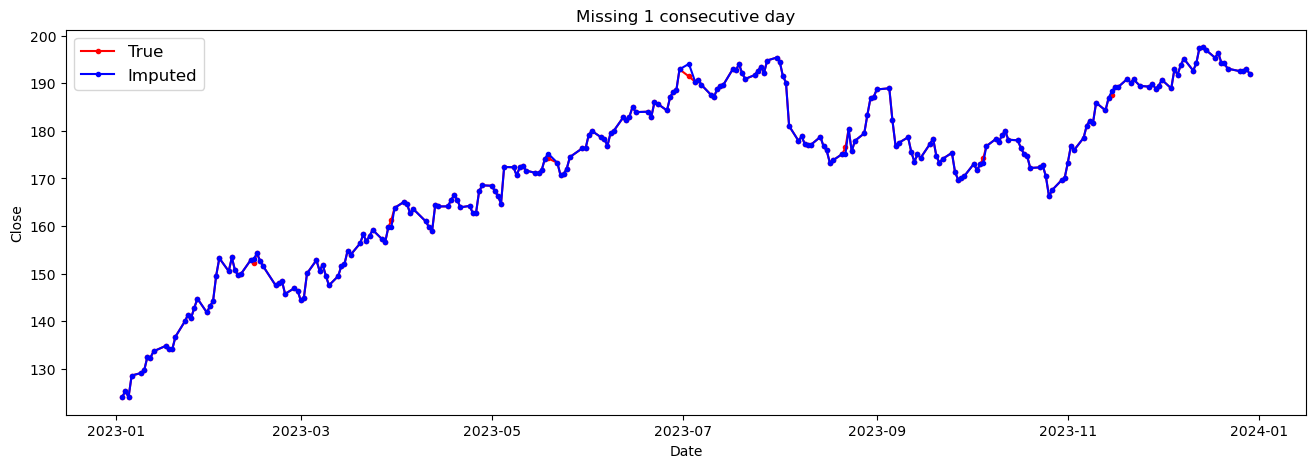

In [24]:
## Plot
import datetime

plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df1['1day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 1 consecutive day')

plt.show()

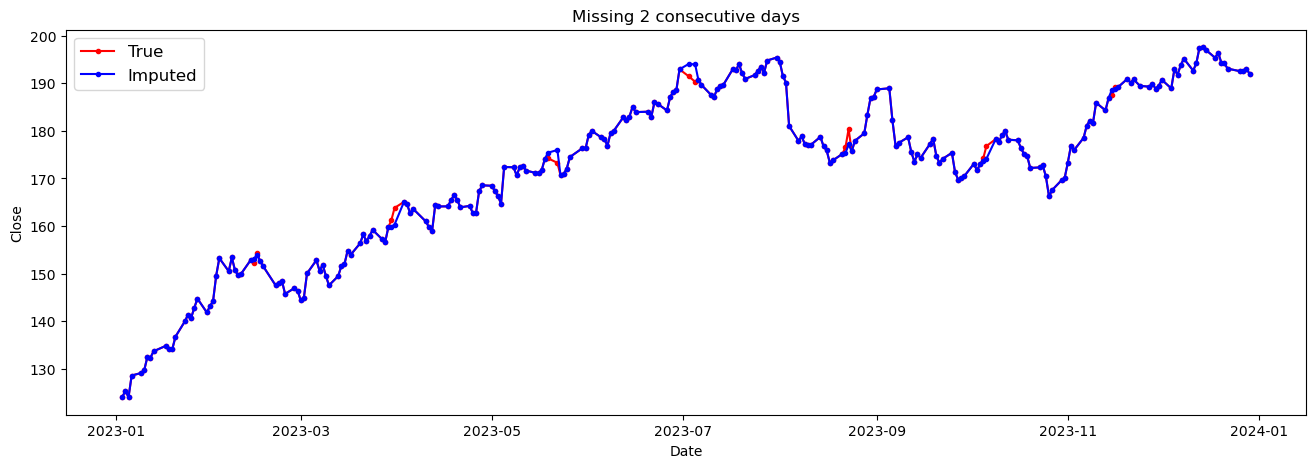

In [25]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df2['2day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 2 consecutive days')

plt.show()

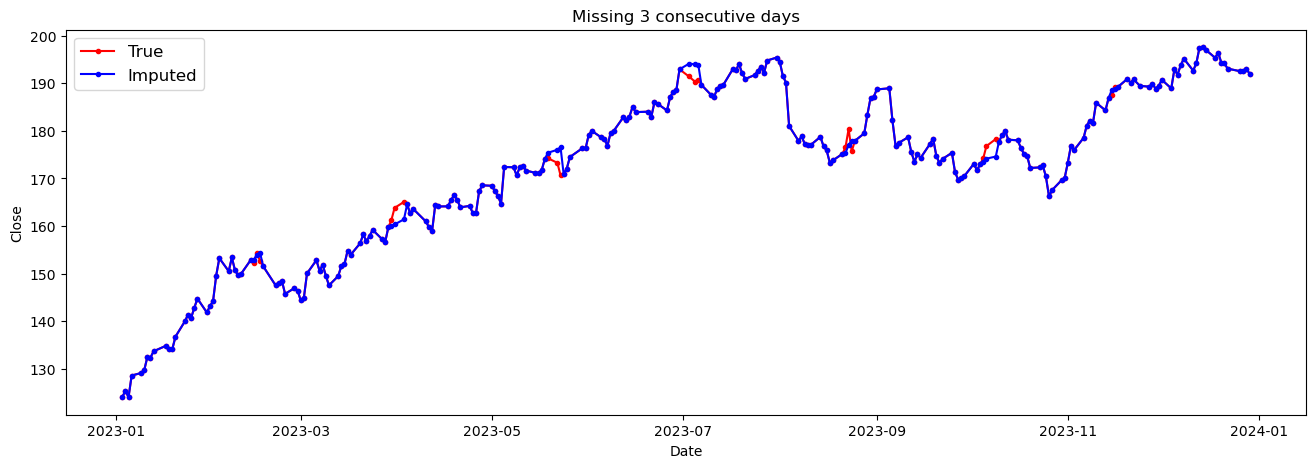

In [26]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df3['3day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 3 consecutive days')

plt.show()

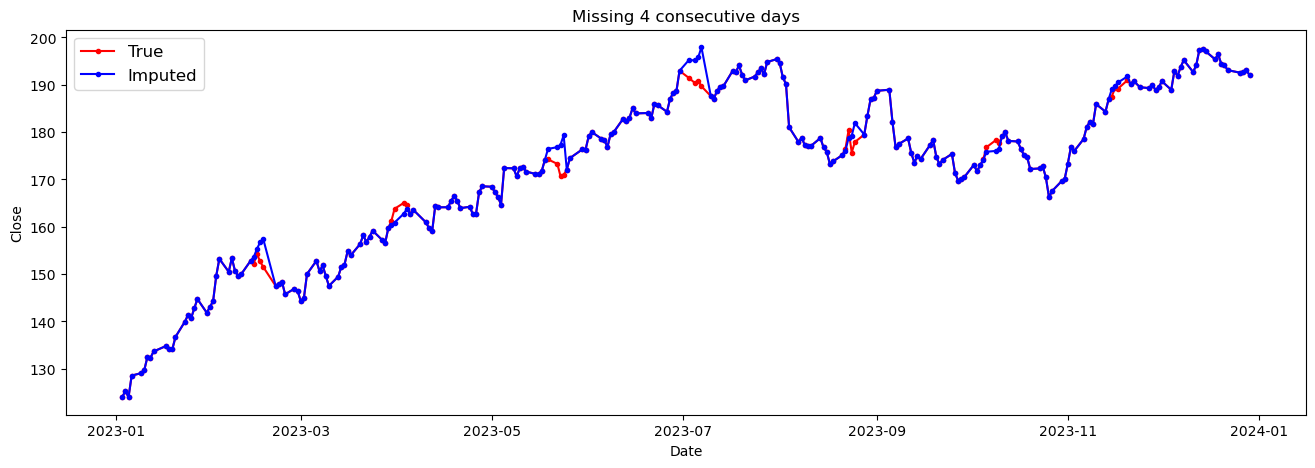

In [27]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df4['4day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 4 consecutive days')

plt.show()

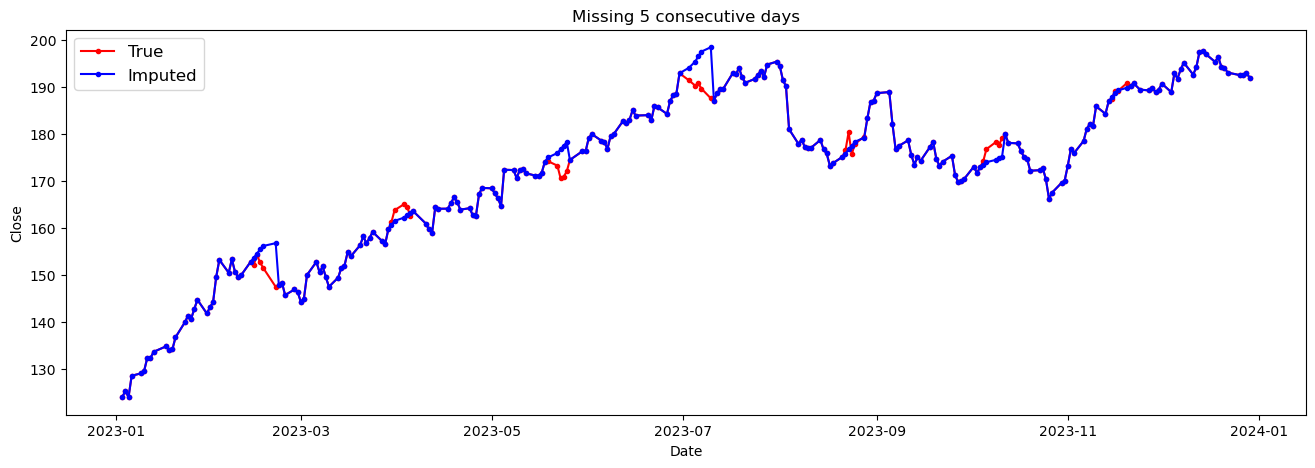

In [28]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df5['5day'],'.-',color='b',label='Imputed')
#plt.plot(nvda_data['Close'],'.-',color='k',label='NVDA')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 5 consecutive days')

plt.show()

## Compare MSES

In [29]:
print('Missing 1 consecutive data')
print(mses1)
print('------------------')

print('Missing 2 consecutive data')
print(mses2)
print('------------------')

print('Missing 3 consecutive data')
print(mses3)
print('------------------')

print('Missing 4 consecutive data')
print(mses4)
print('------------------')

print('Missing 5 consecutive data')
print(mses5)
print('------------------')

Missing 1 consecutive data
{'Linear Interpolating': 0.679228361280242, 'VAR model': 2.0178131842416693}
------------------
Missing 2 consecutive data
{'Linear Interpolating': 2.526317467717179, 'VAR model': 4.627628459045149}
------------------
Missing 3 consecutive data
{'Linear Interpolating': 1.8751985815220782, 'VAR model': 6.896456518175831}
------------------
Missing 4 consecutive data
{'Linear Interpolating': 3.398599024755626, 'VAR model': 13.442298196197507}
------------------
Missing 5 consecutive data
{'Linear Interpolating': 3.475544046464251, 'VAR model': 16.373602652882198}
------------------


## Plot MSE

In [30]:
#plt.figure(figsize=((16,5)))

ratio = np.zeros(5)

mses = [mses1, mses2, mses3, mses4, mses5]

for i, mse in enumerate(mses):
    ratio[i] = mse['VAR model']/mse['Linear Interpolating']

In [31]:
ratio

array([2.97074342, 1.83176838, 3.67772064, 3.95524688, 4.71109053])

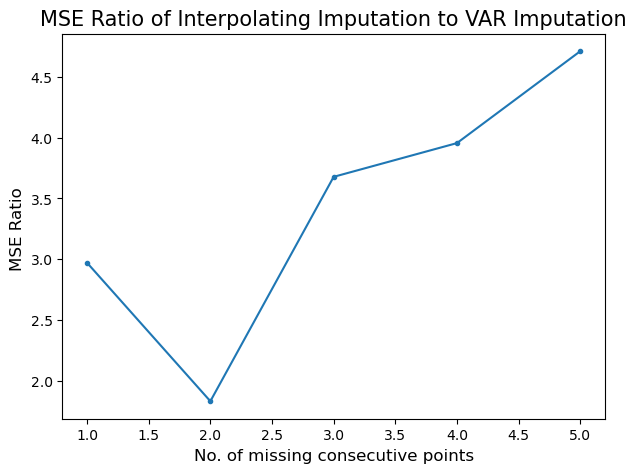

In [44]:
plt.figure(figsize=((7,5)))

plt.plot(range(1,6),ratio,'.-')
plt.xlabel('No. of missing consecutive points', fontsize=12)
plt.ylabel('MSE Ratio ', fontsize=12)

plt.title('MSE Ratio of Interpolating Imputation to VAR Imputation', fontsize=15)

plt.savefig('MSE Ratio.jpg')
plt.show()

<Figure size 640x480 with 0 Axes>